### 1. Data Preprocessing

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

2024-05-09 10:17:46.367114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 10:17:46.367255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 10:17:46.513834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Importing Input Data
test_data = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")
train_data = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (700, 2)
Test Data Shape:  (300, 2)


In [3]:
# Checking for missing data and outliers
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [4]:
train_data.describe() # One y value is missing

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [5]:
new_train_data = train_data.dropna(axis=0)
new_train_data.shape

(699, 2)

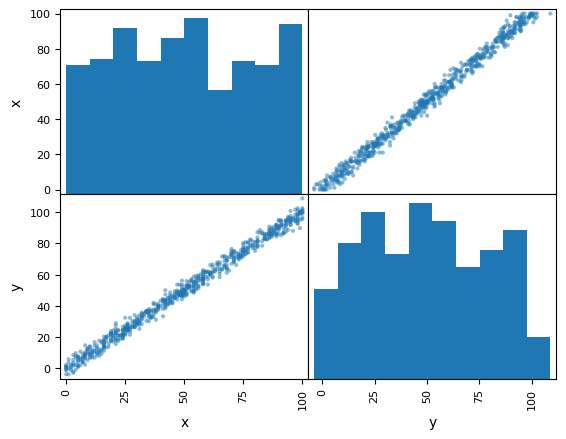

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_train_data)
plt.show()

In [7]:
X_train = new_train_data.x.to_numpy().reshape(-1,1)
y_train = new_train_data.y.to_numpy().reshape(-1,1)

X_test = test_data.x.to_numpy().reshape(-1,1)
y_test = test_data.y.to_numpy().reshape(-1,1)

### 2. Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(X_train, y_train)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for Linear Regression is: ", lin_rmse)
print("R2 Score for Linear Regression is: " , lin_reg.score(X_train,y_train))

RMSE for Linear Regression is:  2.8060032573697113
R2 Score for Linear Regression is:  0.9907015319025518


### 3. Probabilistic Linear Regression

Assume a zero-mean Gaussian prior on w

In [10]:
beta = 0.2
lbda = 1

In [11]:
sigma = np.linalg.inv(beta*np.matmul(X_train.T,X_train)+lbda*np.eye(X_train.shape[1]))
sigma

array([[2.14253423e-06]])

In [12]:
mu = np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)+(lbda/beta)*np.eye(X_train.shape[1])), np.matmul(X_train.T,y_train))
mu

array([[0.99904734]])

In [13]:
y_pred = []
for x in X_test:
    mu_ppd = np.matmul(mu.T, x)[0]
    sigma_ppd = (1/beta)+np.matmul(x.T, np.matmul(sigma, x))
    y_pred.append([mu_ppd, sigma_ppd])
    
y_pred[:5]

[[76.92664494674355, 5.012703085463548],
 [20.979994076384607, 5.000944857596462],
 [21.9790414133553, 5.001036986568453],
 [19.98094673941391, 5.0008570136929364],
 [35.965704130945035, 5.002776724365114]]

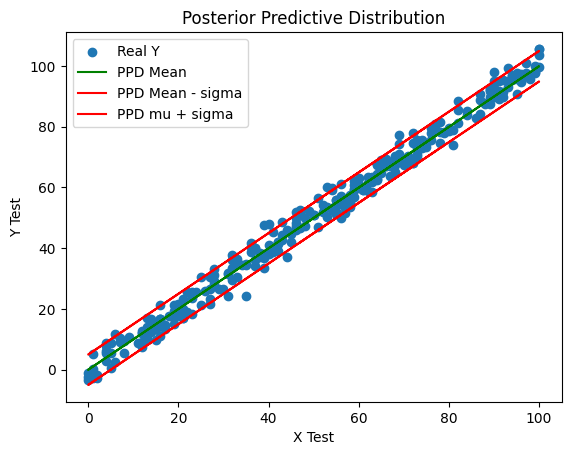

In [14]:
plt.scatter(X_test.reshape(-1,), y_test.reshape(-1,))
plt.plot(X_test.reshape(-1,), np.array([x[0] for x in y_pred]), c="g")
plt.plot(X_test.reshape(-1,), np.array([x[0]+x[1] for x in y_pred]), c="r")
plt.plot(X_test.reshape(-1,), np.array([x[0]-x[1] for x in y_pred]), c="r")
plt.legend(["Real Y", "PPD Mean", "PPD Mean - sigma", "PPD mu + sigma"])
plt.title("Posterior Predictive Distribution")
plt.xlabel("X Test")
plt.ylabel("Y Test")
plt.show()